## Data Science in Human Resources Department

Hiring and retaining top talent is an extremely challenging task that requires capital, time and skills. Small business owners spend  40% of their working hours on tasks that does not generate any revenue such as Hiring. Company spent 15-20 percent of the employees salary to recurit a new candidate , which is a massive amount especially for large corporations with thousands of employees. So, in this task we used Data science to predict whether an employee is going to exit or retain based on their current behaviours and past data's. This method will indeed save 100s of thousands of money to a company.

### About this project

* Developed an AI model to Reduce hiring and training costs of employees by predicting which employees might leave the company
* Trained the model using logistic regression classifier and random forest classifier model using scikit-learn
* Visualized the given data using Kernel Density Estimate (KDE) plots , box plots and count plots using seaborn and matplotlib

DataSet :https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset 

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
df=pd.read_csv('Human_Resources.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [81]:
df.shape

(1470, 35)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [83]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [84]:
columns=['Attrition','OverTime','Over18']
df['Attrition']=df['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)
df['OverTime']=df['OverTime'].apply(lambda x: 1 if x=='Yes' else 0)
df['Over18']=df['Over18'].apply(lambda x: 1 if x=='Y' else 0)
df['Gender']=df['Gender'].apply(lambda x: 1 if x=='Male' else 0)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [85]:
df.isnull().value_counts()

Age    Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  Over18  OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
False  False      False           False      False       False             False      False           False          False           False                    False   False       False           False     False    False            False          False          False        False               False   False     False              False              False                     False          False             False              False                  F

### Data Visualization 

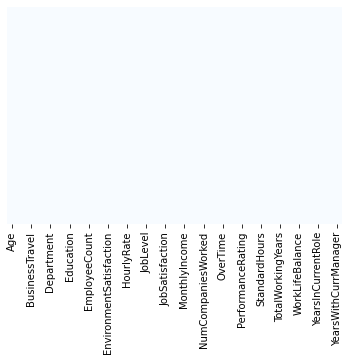

In [86]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CB47729E20>,
      dtype=object)

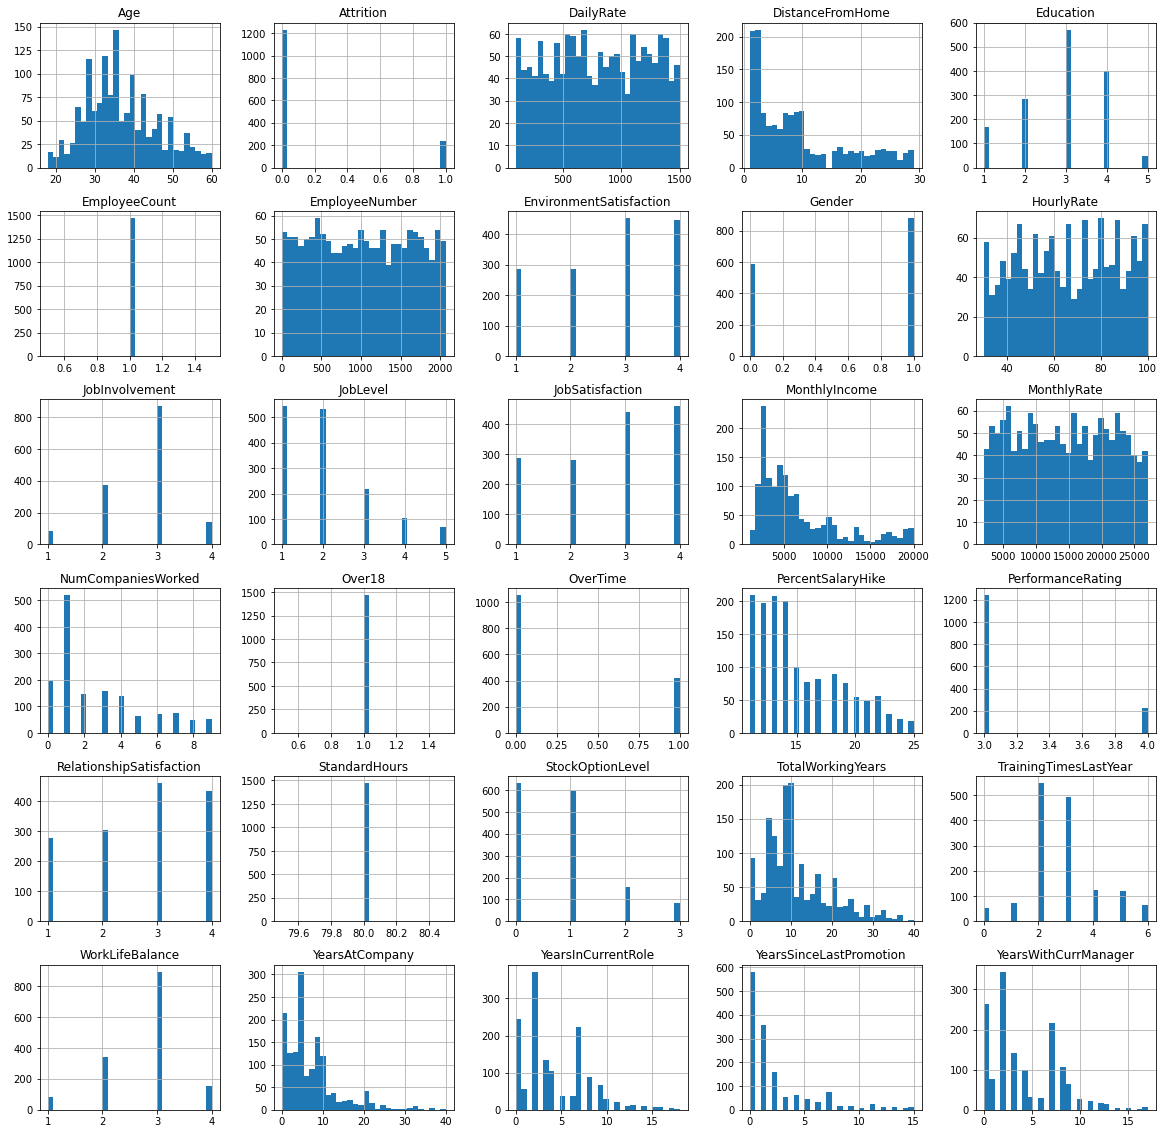

In [87]:
df.hist(bins=30,figsize=(20,20))

In [88]:
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1, inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,1,...,3,4,0,17,3,2,9,6,0,8


In [89]:
left_df = df[df['Attrition']==1]
stayed_df=df[df['Attrition']==0]

In [90]:
left_df.shape[0],stayed_df.shape[0]

(237, 1233)

In [91]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,0.632911,65.573840,2.518987,1.637131,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,0.483031,20.099958,0.773405,0.940594,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,0.000000,31.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,0.000000,50.000000,2.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,1.000000,66.000000,3.000000,1.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,1.000000,84.000000,3.000000,2.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,1.000000,100.000000,4.000000,5.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [92]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,0.593674,65.952149,2.770479,2.145985,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,0.491346,20.380754,0.692050,1.117933,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,0.000000,48.000000,2.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,1.000000,66.000000,3.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,1.000000,83.000000,3.000000,3.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,1.000000,100.000000,4.000000,5.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


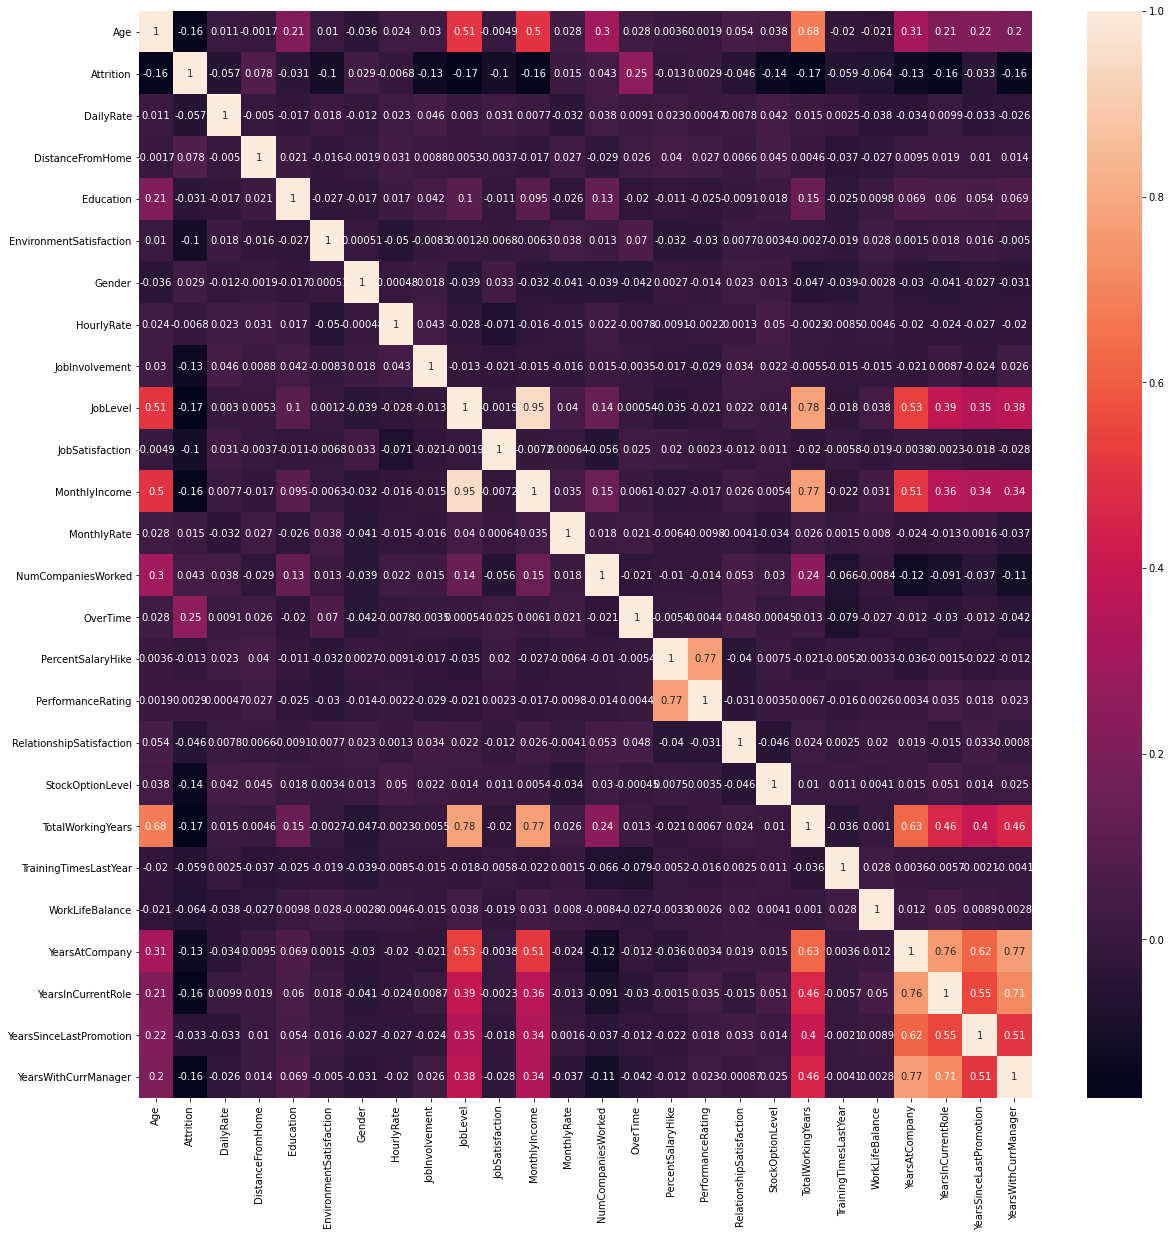

In [93]:
correlations=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlations, annot=True)

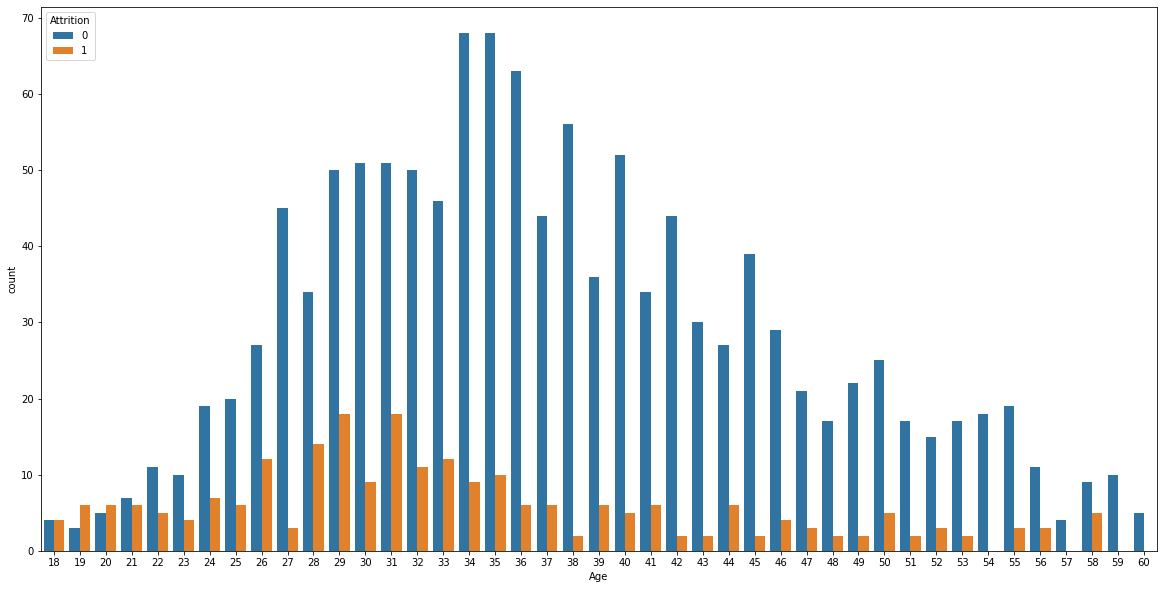

In [94]:
plt.figure(figsize=(20,10))
sns.countplot(x='Age', hue='Attrition',data=df)

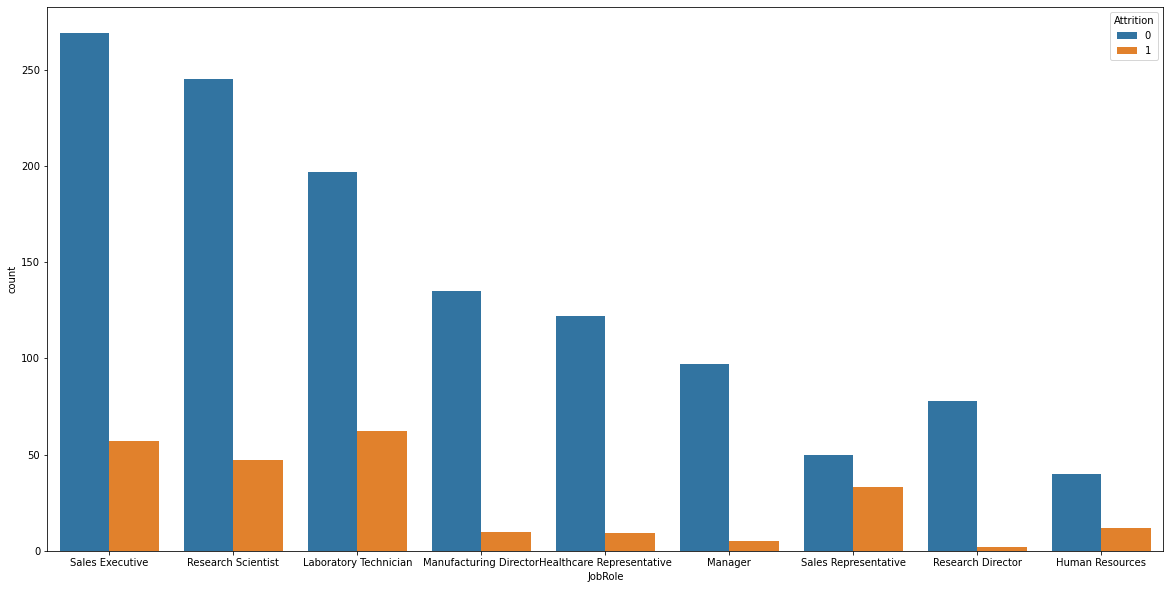

In [95]:
plt.figure(figsize=(20,10))
sns.countplot(x='JobRole',hue='Attrition',data=df)

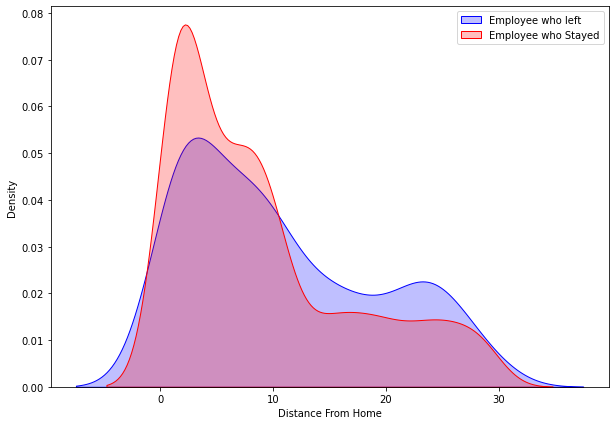

In [96]:
plt.figure(figsize=(10,7))
sns.kdeplot(left_df['DistanceFromHome'],label='Employee who left', shade=True,color='b')
sns.kdeplot(stayed_df['DistanceFromHome'],label='Employee who Stayed', shade=True,color='r')
plt.xlabel('Distance From Home')
plt.legend()

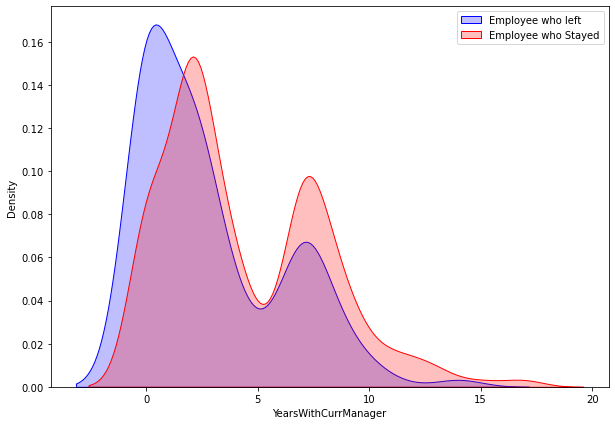

In [97]:
plt.figure(figsize=(10,7))
sns.kdeplot(left_df['YearsWithCurrManager'],label='Employee who left', shade=True,color='b')
sns.kdeplot(stayed_df['YearsWithCurrManager'],label='Employee who Stayed', shade=True,color='r')
plt.xlabel('YearsWithCurrManager')
plt.legend()

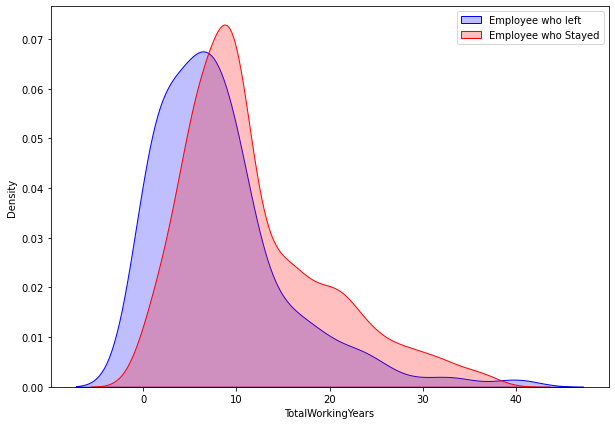

In [98]:
plt.figure(figsize=(10,7))
sns.kdeplot(left_df['TotalWorkingYears'],label='Employee who left', shade=True,color='b')
sns.kdeplot(stayed_df['TotalWorkingYears'],label='Employee who Stayed', shade=True,color='r')
plt.xlabel('TotalWorkingYears')
plt.legend()

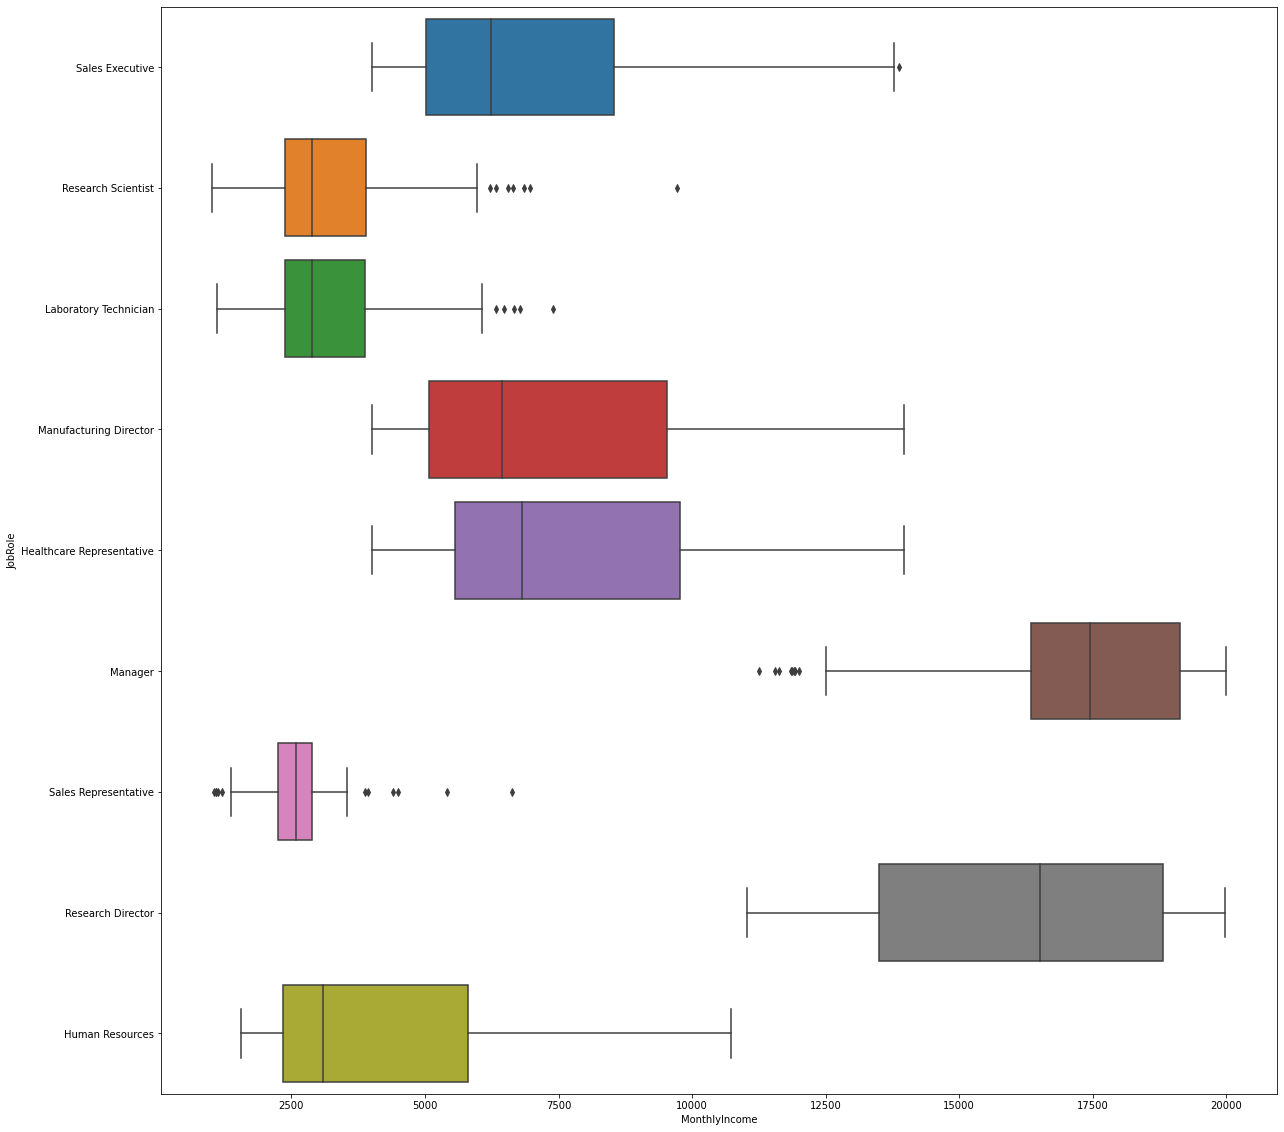

In [99]:
plt.figure(figsize=(20,20))
sns.boxplot(x='MonthlyIncome',y='JobRole',data=df)

### Data Preprocessing and Cleaning

In [100]:
X_cat=df[['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']]

In [101]:
X_cat.head()

,BusinessTravel,Department,EducationField,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Married


In [102]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder()
X_cat=onehotencoder.fit_transform(X_cat).toarray()
X_cat

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [103]:
X_cat=pd.DataFrame(X_cat)
X_cat

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [109]:
X_numerical=df.drop(['BusinessTravel','Department','EducationField','JobRole','MaritalStatus','Attrition'],axis='columns')
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,0,94,3,2,4,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,1,61,2,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,1,92,2,1,3,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,0,56,3,1,3,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,1,40,3,1,2,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,1,41,4,2,4,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,1,42,2,3,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,1,87,4,2,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,1,63,2,2,2,...,3,4,0,17,3,2,9,6,0,8


In [110]:
X_all=pd.concat([X_numerical,X_cat],axis='columns')
X_all.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,14,15,16,17,18,19,20,21,22,23
0,41,1102,1,2,2,0,94,3,2,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,279,8,1,3,1,61,2,2,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1373,2,2,4,1,92,2,1,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,1392,3,4,4,0,56,3,1,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,27,591,2,1,1,1,40,3,1,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [111]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler=MinMaxScaler()
X=minmaxscaler.fit_transform(X_all)

In [112]:
X

array([[0.54761905, 0.71581961, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.73809524, 0.12670007, 0.25      , ..., 0.        , 1.        ,
        0.        ],
       [0.45238095, 0.90980673, 0.03571429, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.21428571, 0.03793844, 0.10714286, ..., 0.        , 1.        ,
        0.        ],
       [0.73809524, 0.65926986, 0.03571429, ..., 0.        , 1.        ,
        0.        ],
       [0.38095238, 0.37652112, 0.25      , ..., 0.        , 1.        ,
        0.        ]])

In [113]:
Y=df['Attrition']
Y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

# Model Training

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [115]:
X_train.shape

(1102, 49)

In [116]:
X_test.shape

(368, 49)

#### Logistic Regression Classifier

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [159]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [160]:
y_pred=model.predict(X_test)

In [161]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [162]:
from sklearn.metrics import confusion_matrix,classification_report

accuracy_score(Y_test,y_pred)

0.8967391304347826

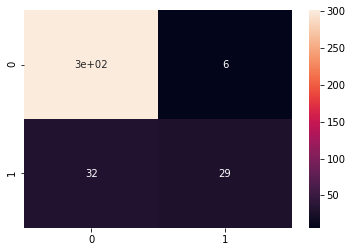

In [163]:
cm=confusion_matrix(Y_test,y_pred)
sns.heatmap(cm,annot=True)

In [164]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       307
           1       0.83      0.48      0.60        61

    accuracy                           0.90       368
   macro avg       0.87      0.73      0.77       368
weighted avg       0.89      0.90      0.88       368



#### Random Forest Classifier 

In [165]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [166]:
y_pred=model.predict(X_test)

In [167]:
accuracy_score(Y_test,y_pred)

0.8559782608695652

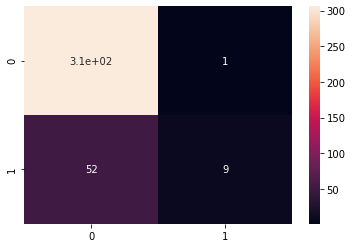

In [168]:
cm=confusion_matrix(Y_test,y_pred)
sns.heatmap(cm,annot=True)

In [169]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       307
           1       0.90      0.15      0.25        61

    accuracy                           0.86       368
   macro avg       0.88      0.57      0.59       368
weighted avg       0.86      0.86      0.81       368



####  Deep learning Model 

In [170]:
import tensorflow as tf
from tensorflow import keras

In [172]:
model=keras.Sequential([
    keras.layers.Dense(256,input_shape=(49,),activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [173]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               12800     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 45,825
Trainable params: 45,825
Non-trainable params: 0
_________________________________________________________________


In [174]:
history=model.fit(X_train,Y_train,epochs=100, batch_size=50)

Epoch 1/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4521 - accuracy: 0.8276
Epoch 2/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3901 - accuracy: 0.8412
Epoch 3/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3538 - accuracy: 0.8566
Epoch 4/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3368 - accuracy: 0.8603
Epoch 5/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.8721
Epoch 6/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2990 - accuracy: 0.8848
Epoch 7/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2784 - accuracy: 0.8993
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2675 - accuracy: 0.9047
Epoch 9/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2541 - accuracy: 0.9020
Epoch 10/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2432 - accuracy: 0.9120
Epoch 11/

23/23 [==============================] - 0s 1ms/step - loss: 6.0273e-04 - accuracy: 1.0000
Epoch 83/100
23/23 [==============================] - 0s 1ms/step - loss: 5.6234e-04 - accuracy: 1.0000
Epoch 84/100
23/23 [==============================] - 0s 1ms/step - loss: 5.4428e-04 - accuracy: 1.0000
Epoch 85/100
23/23 [==============================] - 0s 1ms/step - loss: 5.1287e-04 - accuracy: 1.0000
Epoch 86/100
23/23 [==============================] - 0s 1ms/step - loss: 5.1280e-04 - accuracy: 1.0000
Epoch 87/100
23/23 [==============================] - 0s 1ms/step - loss: 4.7722e-04 - accuracy: 1.0000
Epoch 88/100
23/23 [==============================] - 0s 1ms/step - loss: 4.6604e-04 - accuracy: 1.0000
Epoch 89/100
23/23 [==============================] - 0s 2ms/step - loss: 4.4990e-04 - accuracy: 1.0000
Epoch 90/100
23/23 [==============================] - 0s 1ms/step - loss: 4.4239e-04 - accuracy: 1.0000
Epoch 91/100
23/23 [==============================] - 0s 2ms/step - loss: 4.1

In [175]:
y_pred=model.predict(X_test)

In [177]:
y_pred=y_pred>0.5
y_pred

array([[ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

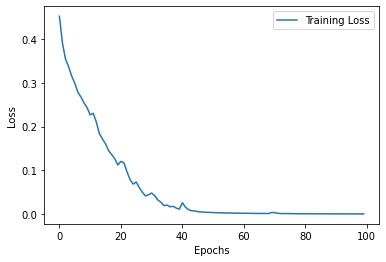

In [180]:
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss'])

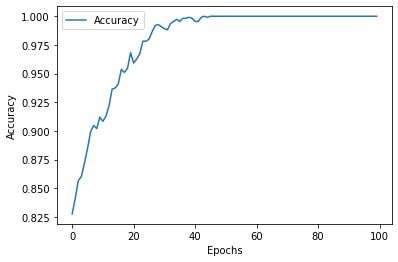

In [182]:
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy'])

In [184]:
model.evaluate(X_test,Y_test)

12/12 [==============================] - 0s 1ms/step - loss: 1.1777 - accuracy: 0.8315


[1.1776859760284424, 0.83152174949646]

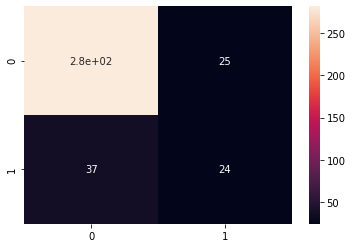

In [185]:
cm=confusion_matrix(Y_test,y_pred)
sns.heatmap(cm,annot=True)

In [186]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       307
           1       0.49      0.39      0.44        61

    accuracy                           0.83       368
   macro avg       0.69      0.66      0.67       368
weighted avg       0.82      0.83      0.82       368

